### Description:
In this notebook, my goal is to explore count Named entities found in all files. <br>

In **Stage 1: Import data**:<br>
I just import processed data I did in notebook **EDA_1_...** which has 4 columns: **FileName**, **Sentence**, 
**Clean sentence**, **Lemmatized**.<br>
But this time I drop columns **Clean sentence**, **Lemmatized** as I will use sentences in their original form in column **Sentence**.

In **Stage 2: Find Named enetities**:<br>
I find named entities for each sentence, extract named entities found from sentence and <br>
save extracted entites in new column **Sentence_wo_NEs** and sentence cleaned from entites in new column **Sentence_wo_NEs**.

In **Stage 3: Count Named entities**:<br>
I observe count of named entities using bar chart.

In [1]:
import pandas as pd
import re
from collections import Counter, defaultdict
from itertools import combinations as combs
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import STOPWORDS
import spacy

### Stage 1: Import data

In [2]:
# 1
# Import data
df = pd.read_csv("Processed_data.csv")

# 2
# Remove rows containing NaN
df = df[df['Clean sentence'].notnull()]

# 3
# Check data
print("DF shape:", df.shape)
df.head()

DF shape: (935, 4)


,FileName,Sentence,Clean sentence,Lemmatized
0,doc1.txt,Let me begin by saying thanks to all you who'v...,let me begin thanks traveled far wide brave co...,let i begin thank travel far wide brave cold t...
1,doc1.txt,We all made this journey for a reason.,journey reason,journey reason
2,doc1.txt,"It's humbling, but in my heart I know you didn...",humbling heart i know come me came believe cou...,humble heart i know come i come believe country
3,doc1.txt,"In the face of war, you believe there can be p...",face war believe peace,face war believe peace
4,doc1.txt,"In the face of despair, you believe there can ...",face despair believe hope,face despair believe hope


In [3]:
# 4
# Drop processed columns
df.drop(labels=['Clean sentence', 'Lemmatized'], axis=1, inplace=True)
df.head()

,FileName,Sentence
0,doc1.txt,Let me begin by saying thanks to all you who'v...
1,doc1.txt,We all made this journey for a reason.
2,doc1.txt,"It's humbling, but in my heart I know you didn..."
3,doc1.txt,"In the face of war, you believe there can be p..."
4,doc1.txt,"In the face of despair, you believe there can ..."


### Stage 2: Find Named Entities

In [4]:
# Load English model
nlp = spacy.load('en_core_web_sm')

# Add the component to the pipeline
nlp.add_pipe('sentencizer', before="parser")

In [5]:
# function extracts NEs from sentence and returns them as tuple
def seperate_NEs_from_sent(s, model):
    doc = model(s)

    new_s = s
    NEs = []
    for ent in doc.ents:
        NEs.append(ent.text)
        new_s = new_s[:ent.start_char] + " "*len(ent.text) + new_s[ent.end_char:]

    new_s = re.sub("\s+", " ", new_s)
    
    if len(NEs)==0:
        return None, new_s
    return NEs, new_s


In [6]:
# Apply function
df[["NEs", "Sentence_wo_NEs"]] = df["Sentence"].apply(lambda x: seperate_NEs_from_sent(x, nlp)).apply(pd.Series)

In [7]:
df.head()

,FileName,Sentence,NEs,Sentence_wo_NEs
0,doc1.txt,Let me begin by saying thanks to all you who'v...,[today],Let me begin by saying thanks to all you who'v...
1,doc1.txt,We all made this journey for a reason.,None,We all made this journey for a reason.
2,doc1.txt,"It's humbling, but in my heart I know you didn...",None,"It's humbling, but in my heart I know you didn..."
3,doc1.txt,"In the face of war, you believe there can be p...",None,"In the face of war, you believe there can be p..."
4,doc1.txt,"In the face of despair, you believe there can ...",None,"In the face of despair, you believe there can ..."


### Stage 3: Count Named entities

In [8]:
# Get list of Named entities
NEs = []

for ne in df.NEs.tolist():
    if str(ne) != 'None':
        NEs.extend(ne)

In [9]:
# Get count of NEs
ne2freq = Counter(NEs).most_common()

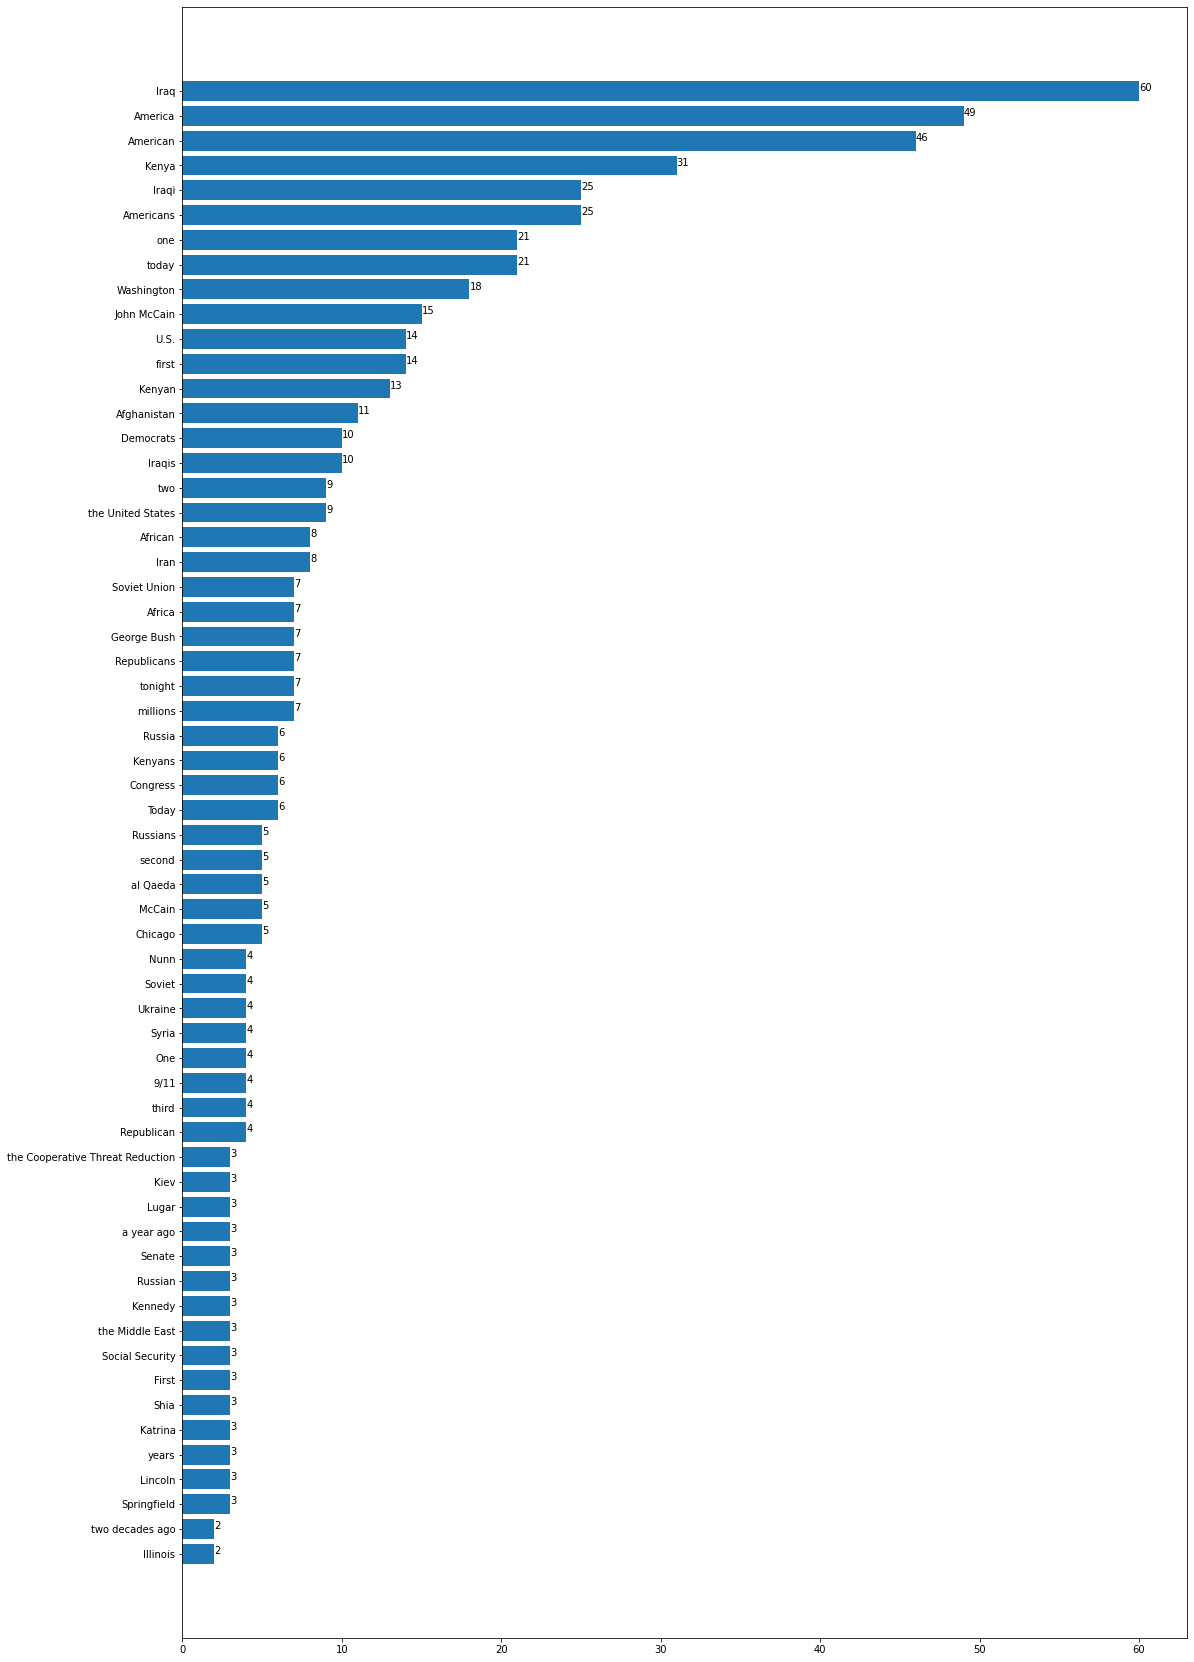

In [34]:
# Get top N common tokens
top = 60
ne2freq = ne2freq[:top]

# Sort
ne2freq = sorted(ne2freq, key=lambda x: x[1], reverse=False)

#
tokens_ = [t for t,c in ne2freq]
counts_ = [c for t,c in ne2freq]

# 6.2
# Plot bar chart
y = range(len(tokens_))
plt.figure(figsize=(18,30))           # option to configure chrat size, this line should come first
plt.barh(y, counts_)
plt.yticks(y, tokens_)  # option to rotate bar names

# Put values to bar tops
for ix, v in enumerate(counts_):
    plt.text(v, ix, str(v))
    
plt.show()